# Data Normalization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('data/winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

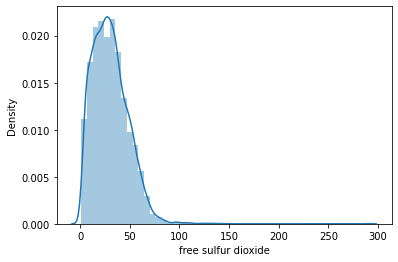

In [19]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

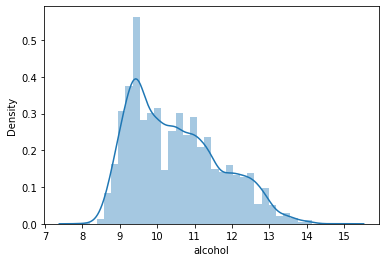

In [20]:
sns.distplot(df['alcohol'])

## Max absolute scaling

In [10]:
## value / max_value

In [11]:
df_temp = df.copy()

In [12]:
df_temp['free sulfur dioxide'] = df_temp['free sulfur dioxide'] / df_temp['free sulfur dioxide'].abs().max()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

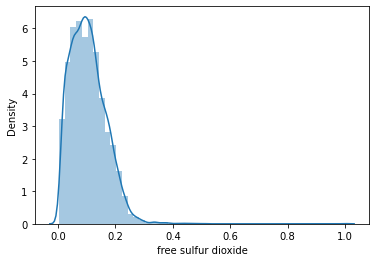

In [13]:
sns.distplot(df_temp['free sulfur dioxide'])

In [21]:
df_temp['alcohol'] = df_temp['alcohol'] / df_temp['alcohol'].abs().max()

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

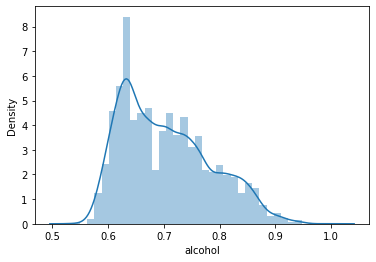

In [22]:
sns.distplot(df_temp['alcohol'])

In [ ]:
# original_value = scaled_value * max

## Min-Max Scaling

In [ ]:
# (value - min) / (max - min)

In [23]:
df_temp = df.copy()

In [24]:
df_temp['alcohol'] = (df_temp['alcohol'] - df_temp['alcohol'].min()) / (df_temp['alcohol'].max() - df_temp['alcohol'].min())

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

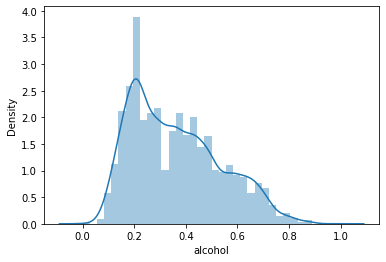

In [25]:
sns.distplot(df_temp['alcohol'])

In [ ]:
# original_value = scaled_value * (max-min) + min

### Log Transformation

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

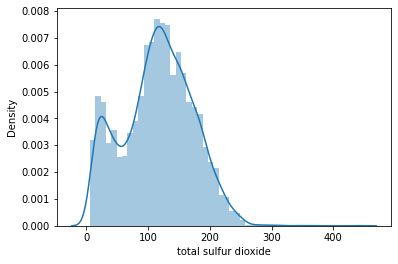

In [27]:
sns.distplot(df['total sulfur dioxide'])

In [28]:
df_temp = df.copy()

In [30]:
df_temp['total sulfur dioxide'] = np.log(df_temp['total sulfur dioxide']+1)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

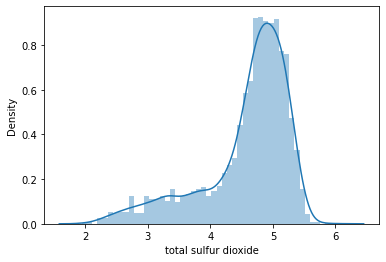

In [32]:
sns.distplot(df_temp['total sulfur dioxide'])

## Standardization of Data

In [ ]:
## z-score method
# scaled_value = value - mean / std

In [ ]:
# original_value = scaled_value * std + mean

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

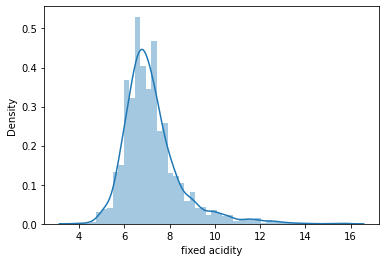

In [40]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

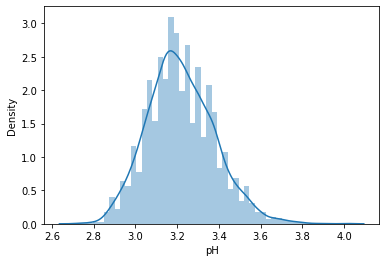

In [39]:
sns.distplot(df['pH'])

In [41]:
scaled_data = df.copy()

In [42]:
## apply the formula
for col in ['fixed acidity', 'pH']:
    scaled_data[col] = (scaled_data[col] - scaled_data[col].mean()) / scaled_data[col].std()

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

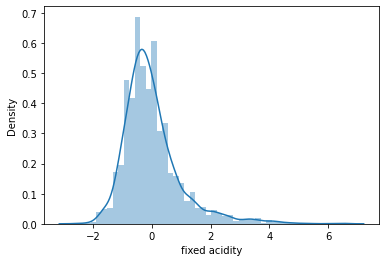

In [43]:
sns.distplot(scaled_data['fixed acidity'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

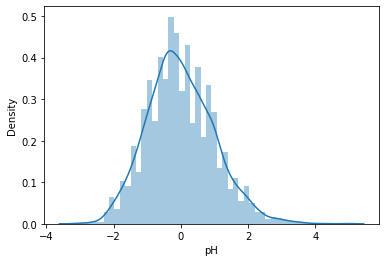

In [44]:
sns.distplot(scaled_data['pH'])

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [47]:
sc.fit(df[['pH']])

StandardScaler()

In [48]:
sc_data = sc.transform(df[['pH']])

In [54]:
sc_data = sc_data.reshape(-1)

<AxesSubplot:xlabel='pH', ylabel='Density'>

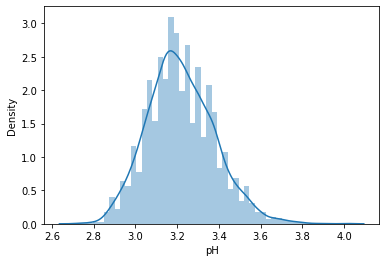

In [56]:
sns.distplot(df['pH'])

<AxesSubplot:ylabel='Density'>

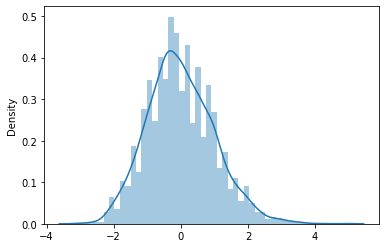

In [55]:
sns.distplot(sc_data)

# Detect and Remove Outliers

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

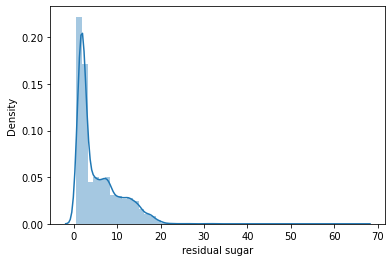

In [5]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='residual sugar'>

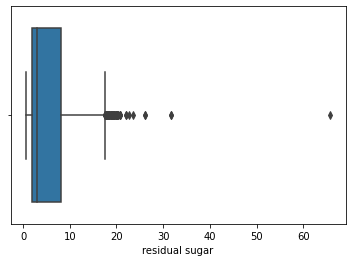

In [6]:
# to see outliers clearly
sns.boxplot(df['residual sugar'])

## Z-score method

In [41]:
# find the limits
upper_limit = df['residual sugar'].mean() + 3*df['residual sugar'].std()
lower_limit = df['residual sugar'].mean() - 3*df['residual sugar'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 19.71870063294501
lower limit: -8.830047823091236


In [42]:
# find the outliers
df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
182,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
191,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
292,white,7.4,0.280,0.42,19.80,0.066,53.0,195.0,1.00000,2.96,0.44,9.1,5
444,white,6.9,0.240,0.36,20.80,0.031,40.0,139.0,0.99750,3.20,0.33,11.0,6
1454,white,8.3,0.210,0.49,19.80,0.054,50.0,231.0,1.00120,2.99,0.54,9.2,5
1608,white,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
1653,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6


In [43]:
# trimming - delete the outlier data
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 6497
after removing outliers: 6469
outliers: 28


<AxesSubplot:xlabel='residual sugar'>

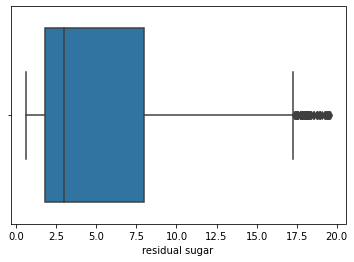

In [44]:
sns.boxplot(new_df['residual sugar'])

In [45]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>=upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<=lower_limit), 'residual sugar'] = lower_limit

<AxesSubplot:xlabel='residual sugar'>

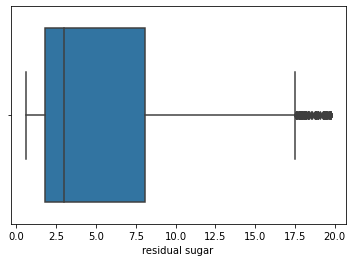

In [46]:
sns.boxplot(new_df['residual sugar'])

In [47]:
len(new_df)

6497

## IQR method

In [48]:
q1 = df['residual sugar'].quantile(0.25)
q3 = df['residual sugar'].quantile(0.75)
iqr = q3-q1

In [49]:
q1, q3, iqr

(1.8, 8.1, 6.3)

In [50]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-7.6499999999999995, 17.549999999999997)

<AxesSubplot:xlabel='residual sugar'>

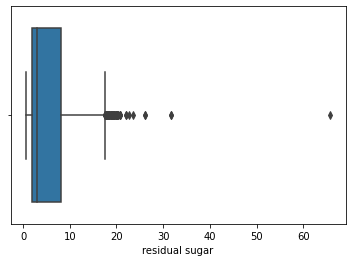

In [51]:
sns.boxplot(df['residual sugar'])

In [52]:
# find the outliers
df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
14,white,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
38,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
39,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691,white,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7
4694,white,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7
4748,white,6.1,0.340,0.24,18.35,0.050,33.0,184.0,0.99943,3.12,0.61,9.30,5
4749,white,6.2,0.350,0.25,18.40,0.051,28.0,182.0,0.99946,3.13,0.62,9.30,6


In [53]:
# trimming - delete the outlier data
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 6497
after removing outliers: 6377
outliers: 120


<AxesSubplot:xlabel='residual sugar'>

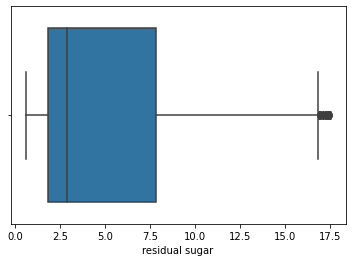

In [54]:
sns.boxplot(new_df['residual sugar'])

In [55]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<lower_limit), 'residual sugar'] = lower_limit

<AxesSubplot:xlabel='residual sugar'>

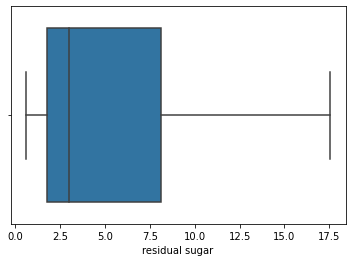

In [56]:
sns.boxplot(new_df['residual sugar'])

## Percentile method

In [57]:
upper_limit = df['residual sugar'].quantile(0.99)
lower_limit = df['residual sugar'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 18.2
lower limit: 0.9


<AxesSubplot:xlabel='residual sugar'>

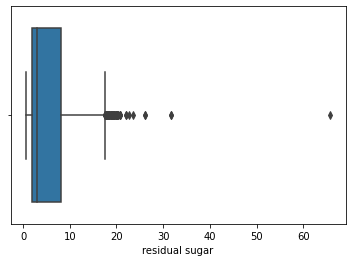

In [58]:
sns.boxplot(df['residual sugar'])

In [59]:
# find the outliers
df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
14,white,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
103,white,7.5,0.305,0.40,18.90,0.059,44.0,170.0,1.00000,2.99,0.46,9.00,5
111,white,7.2,0.270,0.46,18.75,0.052,45.0,255.0,1.00000,3.04,0.52,8.90,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,white,6.2,0.350,0.25,18.40,0.051,28.0,182.0,0.99946,3.13,0.62,9.30,6
4778,white,5.8,0.315,0.19,19.40,0.031,28.0,106.0,0.99704,2.97,0.40,10.55,6
4779,white,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.90,4
4877,white,5.9,0.540,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.80,5


In [60]:
# trimming - delete the outlier data
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 6497
after removing outliers: 6398
outliers: 99


<AxesSubplot:xlabel='residual sugar'>

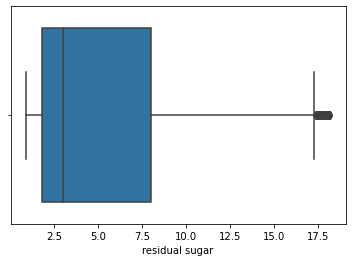

In [61]:
sns.boxplot(new_df['residual sugar'])

In [62]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<lower_limit), 'residual sugar'] = lower_limit

<AxesSubplot:xlabel='residual sugar'>

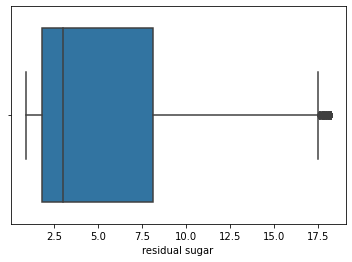

In [63]:
sns.boxplot(new_df['residual sugar'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

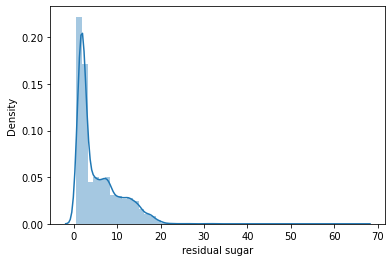

In [65]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

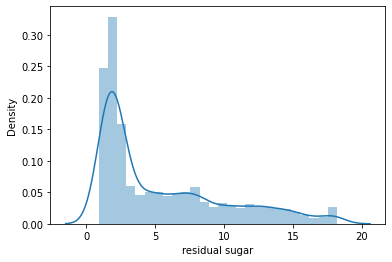

In [64]:
sns.distplot(new_df['residual sugar'])

In [6]:
# data preparation
df = pd.DataFrame()
df['season'] = ['summer', 'autumn', 'spring', 'winter', 'autumn', 'winter']

## Label Encoding

In [7]:
df.head()

,season
0,summer
1,autumn
2,spring
3,winter
4,autumn


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['season_label'] = le.fit_transform(df['season'])
df.head()

,season,season_label
0,summer,2
1,autumn,0
2,spring,1
3,winter,3
4,autumn,0


In [5]:
# map the labels
mapping = {'spring':0, 'summer':1, 'autumn':2, 'winter':3}
df['season_custom_label'] = df['season'].map(mapping)
df.head()

,season,season_label,season_custom_label
0,summer,2,1
1,autumn,0,2
2,spring,1,0
3,winter,3,3
4,autumn,0,2


## One-Hot Encoding

In [9]:
df.head()

,season,season_label
0,summer,2
1,autumn,0
2,spring,1
3,winter,3
4,autumn,0


In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [14]:
ohe.fit_transform(df[['season']]).toarray()

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [15]:
ohe_values = ohe.fit_transform(df[['season']]).toarray()
ohe_df = pd.DataFrame(ohe_values)
enc_df = pd.concat([df, ohe_df], axis=1)
enc_df.head()

,season,season_label,0,1,2,3
0,summer,2,0.0,0.0,1.0,0.0
1,autumn,0,1.0,0.0,0.0,0.0
2,spring,1,0.0,1.0,0.0,0.0
3,winter,3,0.0,0.0,0.0,1.0
4,autumn,0,1.0,0.0,0.0,0.0


In [17]:
## second ohe method using pandas
enc_df = pd.get_dummies(df, prefix=['season'], columns=['season'], drop_first=True)
enc_df.head()

,season_label,season_spring,season_summer,season_winter
0,2,0,1,0
1,0,0,0,0
2,1,1,0,0
3,3,0,0,1
4,0,0,0,0


## Mean/Target Encoding

In [18]:
df = pd.read_csv('data/Loan Prediction Dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#!pip install category_encoders

In [20]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [21]:
from category_encoders import TargetEncoder
cols = ['Gender', 'Dependents']
target = 'Loan_Status'
for col in cols:
    te = TargetEncoder()
    # fit the data
    te.fit(X=df[col], y=df[target])
    # transform
    values = te.transform(df[col])
    df = pd.concat([df, values], axis=1)
    
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Dependents
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,0.693252,0.689855
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,0.693252,0.647059
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,0.693252,0.689855
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,0.693252,0.689855
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,0.693252,0.689855


In [25]:
df.sample(frac=1).head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Dependents
382,LP002231,Female,No,0,Graduate,No,6000,0.0,156.0,360.0,1.0,Urban,1,0.669643,0.689855
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,0,0.615385,0.752475
71,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,1,0.693252,0.752475
474,LP002524,Male,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,1,0.693252,0.752475
266,LP001877,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,1,0.693252,0.752475
541,LP002743,Female,No,0,Graduate,No,2138,0.0,99.0,360.0,0.0,Semiurban,0,0.669643,0.689855
354,LP002143,Female,Yes,0,Graduate,No,2423,505.0,130.0,360.0,1.0,Semiurban,1,0.669643,0.689855
116,LP001404,Female,Yes,0,Graduate,No,3167,2283.0,154.0,360.0,1.0,Semiurban,1,0.669643,0.689855
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,1,0.693252,0.647059
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,1,0.693252,0.689855


In [29]:
df = df[['Education', 'Self_Employed', 'Dependents']]
df = df.iloc[:,:3]
df.head()

,Education,Self_Employed,Dependents
0,Graduate,No,0
1,Graduate,No,1
2,Graduate,Yes,0
3,Not Graduate,No,0
4,Graduate,No,0


## Frequency Encoding

In [30]:
df.head()

,Education,Self_Employed,Dependents
0,Graduate,No,0
1,Graduate,No,1
2,Graduate,Yes,0
3,Not Graduate,No,0
4,Graduate,No,0


In [31]:
df.groupby('Education').size()

Education
Graduate        480
Not Graduate    134
dtype: int64

In [32]:
col = 'Education'
# group by frequency
freq = df.groupby(col).size()/len(df)
# map the values
df.loc[:, "{}_freq".format(col)] = df[col].map(freq)
df.head()

,Education,Self_Employed,Dependents,Education_freq
0,Graduate,No,0,0.781759
1,Graduate,No,1,0.781759
2,Graduate,Yes,0,0.781759
3,Not Graduate,No,0,0.218241
4,Graduate,No,0,0.781759


## Binary Encoding

In [ ]:
# 0 0 - 0
# 0 1 - 1
# 1 0 - 2
# 1 1 - 3

In [38]:
# fill null values
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [39]:
from category_encoders import BinaryEncoder
be = BinaryEncoder()
be_enc = be.fit_transform(df['Self_Employed'])

In [40]:
enc_df = pd.concat([df, be_enc], axis=1)
enc_df.sample(frac=1).head(10)

,Education,Self_Employed,Dependents,Education_freq,Self_Employed_0,Self_Employed_1
291,Graduate,No,2,0.781759,0,1
594,Graduate,Yes,0,0.781759,1,0
179,Not Graduate,No,0,0.218241,0,1
401,Not Graduate,No,0,0.218241,0,1
443,Graduate,No,1,0.781759,0,1
26,Graduate,No,0,0.781759,0,1
219,Graduate,No,2,0.781759,0,1
483,Graduate,No,0,0.781759,0,1
340,Not Graduate,No,3+,0.218241,0,1
273,Graduate,No,0,0.781759,0,1


# Extract Features from Datetime Attributes

In [2]:
df = pd.read_csv('data/Traffic data.csv', nrows=100)
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
# drop columns
df = df.drop(columns=['ID','Count'])

In [5]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.head()

,Datetime
0,2012-08-25 00:00:00
1,2012-08-25 01:00:00
2,2012-08-25 02:00:00
3,2012-08-25 03:00:00
4,2012-08-25 04:00:00


### Extract date features

In [12]:
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['quarter'] = df['Datetime'].dt.quarter
df['day_of_week'] = df['Datetime'].dt.dayofweek
df['week'] = df['Datetime'].dt.week
df['is_weekend'] = np.where(df['day_of_week'].isin([5,6]), 1, 0)
df.sample(frac=1).head(10)

,Datetime,year,month,day,quarter,day_of_week,week,is_weekend
4,2012-08-25 04:00:00,2012,8,25,3,5,34,1
37,2012-08-26 13:00:00,2012,8,26,3,6,34,1
49,2012-08-27 01:00:00,2012,8,27,3,0,35,0
28,2012-08-26 04:00:00,2012,8,26,3,6,34,1
88,2012-08-28 16:00:00,2012,8,28,3,1,35,0
32,2012-08-26 08:00:00,2012,8,26,3,6,34,1
58,2012-08-27 10:00:00,2012,8,27,3,0,35,0
63,2012-08-27 15:00:00,2012,8,27,3,0,35,0
59,2012-08-27 11:00:00,2012,8,27,3,0,35,0
54,2012-08-27 06:00:00,2012,8,27,3,0,35,0


### Extract time features

In [13]:
df['hour'] = df['Datetime'].dt.hour
df['minute'] = df['Datetime'].dt.minute
df['second'] = df['Datetime'].dt.second
df.sample(frac=1).head()

,Datetime,year,month,day,quarter,day_of_week,week,is_weekend,hour,minute,second
11,2012-08-25 11:00:00,2012,8,25,3,5,34,1,11,0,0
64,2012-08-27 16:00:00,2012,8,27,3,0,35,0,16,0,0
50,2012-08-27 02:00:00,2012,8,27,3,0,35,0,2,0,0
3,2012-08-25 03:00:00,2012,8,25,3,5,34,1,3,0,0
46,2012-08-26 22:00:00,2012,8,26,3,6,34,1,22,0,0


In [14]:
df['date'] = df['Datetime'].dt.date
df['time'] = df['Datetime'].dt.time
df.head()

,Datetime,year,month,day,quarter,day_of_week,week,is_weekend,hour,minute,second,date,time
0,2012-08-25 00:00:00,2012,8,25,3,5,34,1,0,0,0,2012-08-25,00:00:00
1,2012-08-25 01:00:00,2012,8,25,3,5,34,1,1,0,0,2012-08-25,01:00:00
2,2012-08-25 02:00:00,2012,8,25,3,5,34,1,2,0,0,2012-08-25,02:00:00
3,2012-08-25 03:00:00,2012,8,25,3,5,34,1,3,0,0,2012-08-25,03:00:00
4,2012-08-25 04:00:00,2012,8,25,3,5,34,1,4,0,0,2012-08-25,04:00:00


In [15]:
import datetime
# find difference from current day
df['difference'] = datetime.datetime.today() - df['Datetime']
df.head()

,Datetime,year,month,day,quarter,day_of_week,week,is_weekend,hour,minute,second,date,time,difference
0,2012-08-25 00:00:00,2012,8,25,3,5,34,1,0,0,0,2012-08-25,00:00:00,3522 days 13:24:49.747950
1,2012-08-25 01:00:00,2012,8,25,3,5,34,1,1,0,0,2012-08-25,01:00:00,3522 days 12:24:49.747950
2,2012-08-25 02:00:00,2012,8,25,3,5,34,1,2,0,0,2012-08-25,02:00:00,3522 days 11:24:49.747950
3,2012-08-25 03:00:00,2012,8,25,3,5,34,1,3,0,0,2012-08-25,03:00:00,3522 days 10:24:49.747950
4,2012-08-25 04:00:00,2012,8,25,3,5,34,1,4,0,0,2012-08-25,04:00:00,3522 days 09:24:49.747950


# Fill Missing Values in Dataset

In [24]:
df = pd.read_csv('data/Loan Prediction Dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
# check null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Fill with negative values

In [37]:
new_df = df.copy()

In [38]:
new_df = df.fillna(-999)
new_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Consider NULL Value as new category

In [39]:
new_df = df.copy()

In [40]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [41]:
# consider nan as category
new_df['Gender'] = df['Gender'].fillna('nan')

In [42]:
new_df['Gender'].value_counts()

Male      489
Female    112
nan        13
Name: Gender, dtype: int64

### Drop rows which have NULL values

In [43]:
new_df = df.copy()

In [44]:
len(df)

614

In [45]:
new_df = df.dropna(axis=0)
len(new_df)

480

In [46]:
new_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Fill missing value with mean, median and mode

In [47]:
new_df = df.copy()

In [48]:
df['LoanAmount'].mean()

146.41216216216216

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

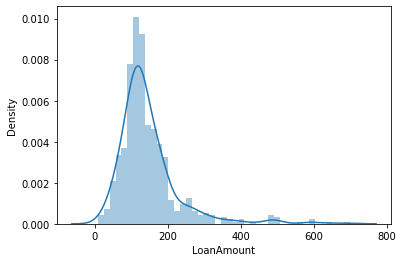

In [49]:
sns.distplot(df['LoanAmount'])

In [50]:
# fill missing value for numerical
new_df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
new_df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

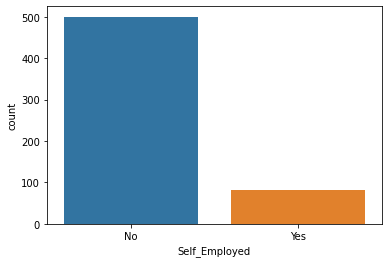

In [53]:
sns.countplot(df['Self_Employed'])

In [55]:
df['Self_Employed'].mode()[0]

'No'

In [56]:
# fill missing value for categorical
new_df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Fill missing value based on grouping category

In [58]:
new_df = df.copy()

In [62]:
df.groupby('Loan_Status').mean()['LoanAmount']

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

In [61]:
mean_df = df.groupby('Loan_Status').mean()['LoanAmount']

In [63]:
mean_df['N']

151.22099447513813

In [69]:
# fill missing value for numerical column
new_df.loc[(new_df['Loan_Status']=='N'), 'LoanAmount'] = new_df.loc[(new_df['Loan_Status']=='N'), 'LoanAmount'].fillna(mean_df['N'])
new_df.loc[(new_df['Loan_Status']=='Y'), 'LoanAmount'] = new_df.loc[(new_df['Loan_Status']=='Y'), 'LoanAmount'].fillna(mean_df['Y'])

In [70]:
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
for val in mean_df.keys():
    print(val)

N
Y


In [73]:
mean_df = df.groupby('Loan_Status').mean()['Loan_Amount_Term']
mean_df

Loan_Status
N    344.064516
Y    341.072464
Name: Loan_Amount_Term, dtype: float64

In [80]:
df.groupby('Loan_Status')['Loan_Amount_Term'].agg(pd.Series.mean)

Loan_Status
N    344.064516
Y    341.072464
Name: Loan_Amount_Term, dtype: float64

In [76]:
for val in mean_df.keys():
    new_df.loc[(new_df['Loan_Status']==val), 'Loan_Amount_Term'] = new_df.loc[(new_df['Loan_Status']==val), 'Loan_Amount_Term'].fillna(mean_df[val])

In [77]:
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
# fill missing value for categorical
mode_df = df.groupby('Loan_Status')['Self_Employed'].agg(pd.Series.mode)
mode_df

Loan_Status
N    No
Y    No
Name: Self_Employed, dtype: object

In [81]:
for val in mode_df.keys():
    new_df.loc[(new_df['Loan_Status']==val), 'Self_Employed'] = new_df.loc[(new_df['Loan_Status']==val), 'Self_Employed'].fillna(mode_df[val])

In [82]:
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Fill missing value using ML Model

In [83]:
new_df = df.copy()

In [92]:
new_df = new_df[['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']]
new_df.head()

,LoanAmount,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome
0,NaN,360.0,5849,0.0
1,128.0,360.0,4583,1508.0
2,66.0,360.0,3000,0.0
3,120.0,360.0,2583,2358.0
4,141.0,360.0,6000,0.0


In [93]:
len(new_df)

614

In [94]:
col = "LoanAmount"

In [95]:
# fill numerical values
new_df_temp = new_df.dropna(subset=[col], axis=0)
print(col, len(new_df_temp))

LoanAmount 592


In [96]:
# input and output split
X = new_df_temp.drop(columns=[col], axis=1)
y = new_df_temp[col]

In [97]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(use_missing=False)
model.fit(X, y)

LGBMRegressor(use_missing=False)

In [98]:
d = {}
temp = new_df.drop(columns=[col], axis=1)
d[col] = list(model.predict(temp))

In [99]:
i = 0
for val, d_val in zip(new_df[col], d[col]):
    if pd.isna(val):
        new_df.at[i, col] = d_val
    i += 1

In [100]:
new_df.isnull().sum()

LoanAmount            0
Loan_Amount_Term     14
ApplicantIncome       0
CoapplicantIncome     0
dtype: int64

In [101]:
new_df.head()

,LoanAmount,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome
0,152.335142,360.0,5849,0.0
1,128.000000,360.0,4583,1508.0
2,66.000000,360.0,3000,0.0
3,120.000000,360.0,2583,2358.0
4,141.000000,360.0,6000,0.0


In [ ]:
# fill missing values for categorical - LGBMClassifer

# Feature Selection Techniques

## Correlation Matrix (Numerical Attributes)

In [2]:
df = pd.read_csv('data/bike sharing dataset.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
corr = df.corr()
corr

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


<AxesSubplot:>

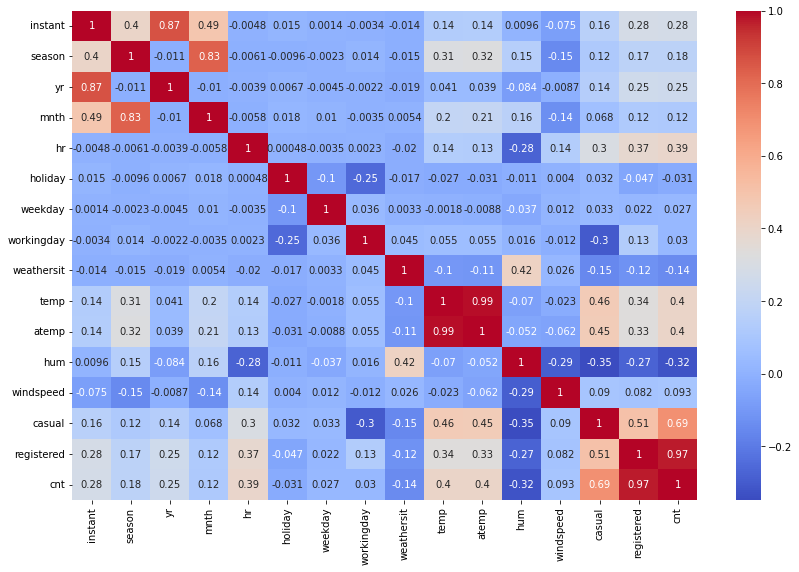

In [8]:
# display correlation matrix in heatmap
corr = df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Chi-Square (Categorical Attributes)

In [10]:
df = pd.read_csv('data/Loan Prediction Dataset.csv')
df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]
# fill null values
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [11]:
# label encoding
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1


In [12]:
from sklearn.feature_selection import chi2
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [14]:
chi_scores = chi2(X, y)

In [15]:
chi_scores

(array([3.62343084e-02, 1.78242499e+00, 8.59527587e-02, 3.54050246e+00,
        7.28480330e-03, 2.60058772e+01, 3.77837464e-01]),
 array([8.49032435e-01, 1.81851834e-01, 7.69386856e-01, 5.98873168e-02,
        9.31982300e-01, 3.40379591e-07, 5.38762867e-01]))

<AxesSubplot:>

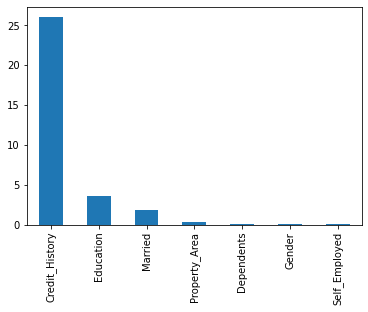

In [16]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<AxesSubplot:>

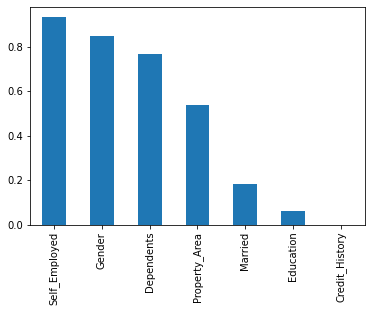

In [17]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

## Recursive Feature Elimination (RFE)

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1


In [19]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [20]:
# input split
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [21]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
rfe.fit(X, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)

In [24]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Gender selected=False rank=4
Married selected=False rank=5
Dependents selected=False rank=3
Education selected=True rank=1
Self_Employed selected=False rank=2
Credit_History selected=True rank=1
Property_Area selected=True rank=1


# Cross Validation Techniques

## KFold Cross Validation

In [3]:
df = pd.read_csv('data/bike sharing dataset.csv')
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'], axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
X = df.drop(columns=['cnt'], axis=1)
y = df['cnt']

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, random_state=42, shuffle=True)
model = RandomForestRegressor()
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
print(f"Error Mean: {np.mean(scores)} Error Std: {np.std(scores)}")

Error Mean: 0.9451816375903522 Error Std: 0.0034610555321333914


## Repeated Stratified KFold Cross Validation

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
model = RandomForestRegressor()
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
print(f"Error Mean: {np.mean(scores)} Error Std: {np.std(scores)}")

Error Mean: 0.9450597389924781 Error Std: 0.0036935612975137313


# Handling Imbalanced Classes

In [13]:
from collections import Counter

In [9]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

<AxesSubplot:xlabel='Class', ylabel='count'>

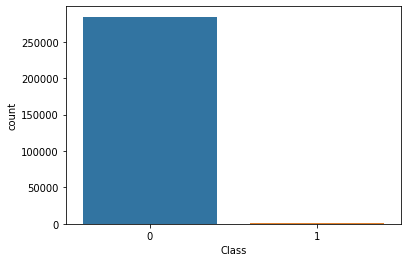

In [12]:
sns.countplot(y)

In [14]:
Counter(y)

Counter({0: 284315, 1: 492})

## Over Sampling Techniques

### RandomOverSampler

In [17]:
## Repeats the same samples in the dataset in random manner

In [ ]:
!pip install imblearn

In [15]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X, y)
Counter(y_over)

Counter({0: 284315, 1: 284315})

In [16]:
oversampler = RandomOverSampler(sampling_strategy=0.3)
X_over, y_over = oversampler.fit_resample(X, y)
Counter(y_over)

Counter({0: 284315, 1: 85294})

### SMOTE (Synthetic Minority Over-sampling Techinique)

In [ ]:
# it will create new samples bases on nearest neighbors

In [21]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(sampling_strategy=0.4)
X_over, y_over = oversampler.fit_resample(X, y)
Counter(y_over)

Counter({0: 284315, 1: 113726})

<AxesSubplot:xlabel='Class', ylabel='count'>

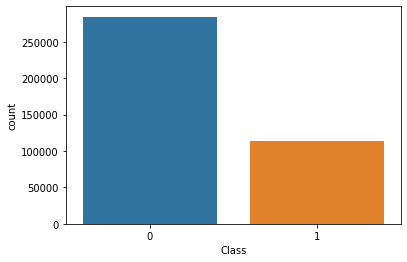

In [22]:
sns.countplot(y_over)

## Under Sampling Technique

### RandomUnderSampler

In [23]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersampler.fit_resample(X, y)
Counter(y_under)

Counter({0: 492, 1: 492})

In [30]:
undersampler = RandomUnderSampler(sampling_strategy=0.2)
X_under, y_under = undersampler.fit_resample(X, y)
Counter(y_under)

Counter({0: 2460, 1: 492})

<AxesSubplot:xlabel='Class', ylabel='count'>

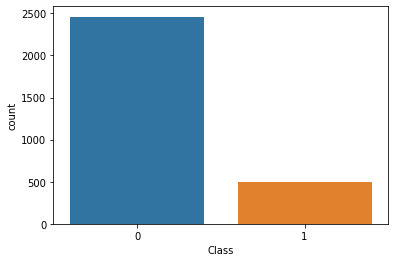

In [31]:
sns.countplot(y_under)

## Combine Oversampling and Undersampling

In [37]:
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
pipeline = Pipeline([('o', over), ('u', under)])
X_resample, y_resample = pipeline.fit_resample(X, y)

<AxesSubplot:xlabel='Class', ylabel='count'>

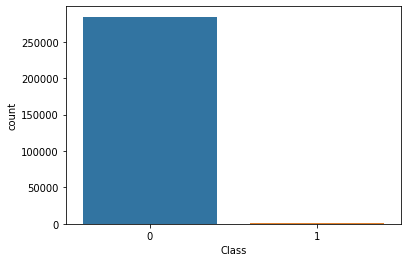

In [38]:
sns.countplot(y)

<AxesSubplot:xlabel='Class', ylabel='count'>

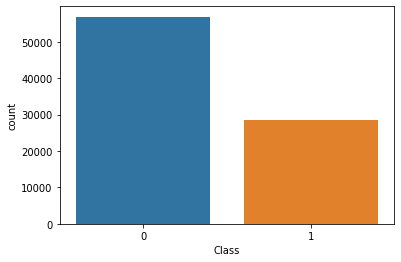

In [39]:
sns.countplot(y_resample)

# Ensembling Techniques

In [46]:
df = pd.read_csv('data/winequality.csv')
df = df.drop(columns=['type'], axis=1)
df = df.fillna(-2)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [47]:
X = df.drop(columns=['quality'], axis=1)
y = df['quality']

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.4664615384615385

## Voting Classifier

In [52]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier()

model = VotingClassifier(estimators=[('lr', model1), ('kn', model2), ('rf', model3)], voting='soft') # soft-probability score, hard-take the majority class
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6344615384615384

## Averaging

In [53]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier()

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

pred1 = model1.predict_proba(x_test)
pred2 = model2.predict_proba(x_test)
pred3 = model3.predict_proba(x_test)

final_pred = (pred1+pred2+pred3)/3

<AxesSubplot:xlabel='quality', ylabel='count'>

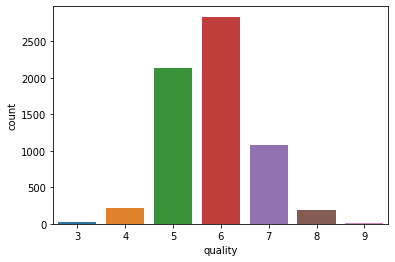

In [56]:
sns.countplot(y)

In [58]:
final_pred

array([[2.00197494e-03, 8.00622692e-03, 4.62873630e-01, ...,
        3.14175685e-02, 1.19202672e-02, 1.93443421e-05],
       [4.84634692e-03, 1.76344906e-02, 5.34755720e-01, ...,
        2.74161344e-02, 8.46195147e-03, 2.05848950e-05],
       [5.11534773e-03, 1.96147189e-02, 2.74824437e-01, ...,
        1.86035677e-01, 3.98274064e-02, 4.01583045e-03],
       ...,
       [1.83534781e-03, 2.05818375e-02, 6.62530834e-01, ...,
        1.02678348e-01, 6.85639154e-03, 6.13865903e-04],
       [1.88135495e-03, 1.91471538e-02, 2.21197692e-01, ...,
        2.26948363e-01, 2.04132847e-02, 3.42074213e-03],
       [1.47880961e-03, 1.04958076e-02, 3.94366651e-01, ...,
        5.45452751e-02, 9.34159743e-03, 9.95620183e-05]])

In [79]:
pred = []
for res in final_pred:
    pred.append(np.argmax(res)+3)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.6350769230769231

## Weighted Average

In [85]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier()

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

pred1 = model1.predict_proba(x_test)
pred2 = model2.predict_proba(x_test)
pred3 = model3.predict_proba(x_test)

final_pred = (pred1*0.25+pred2*0.25+pred3*0.5)/3

In [86]:
pred = []
for res in final_pred:
    pred.append(np.argmax(res)+3)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.6652307692307692

In [ ]:
# advanced ensembling - stacking, blending, bagging, boosting
# ensemble algorithms
# bagging - random forest, bagging
# boosting - gbm, xgboost, lightgbm, catboost

# Dimensionality Reduction Techniques

In [2]:
from keras.datasets import mnist

In [3]:
(X, y), (_,_) = mnist.load_data()
print(X.shape, y.shape)

(60000, 28, 28) (60000,)


In [4]:
X = X.reshape(len(X), -1)
X.shape

(60000, 784)

In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from umap import UMAP

## PCA

In [13]:
x_pca = PCA(n_components=2).fit_transform(X)

In [14]:
x_pca.shape

(60000, 2)

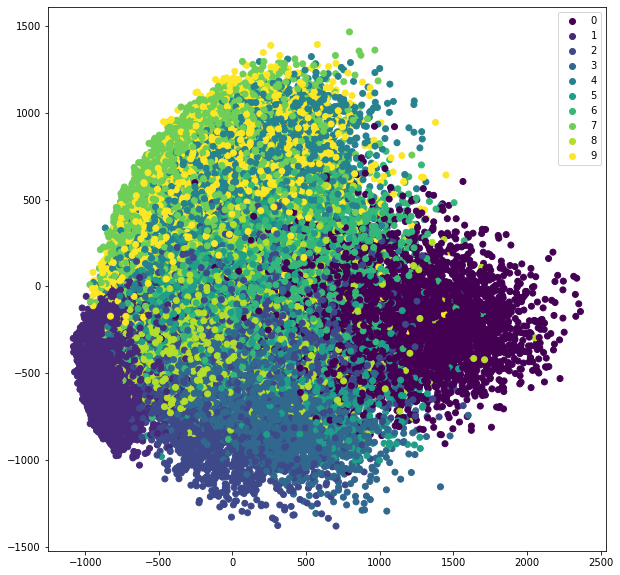

In [21]:
plt.figure(figsize=(10,10))
sc = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.legend(handles=sc.legend_elements()[0], labels=list(range(10)))
plt.show()

## LDA

In [22]:
x_lda = LDA(n_components=2).fit_transform(X, y)

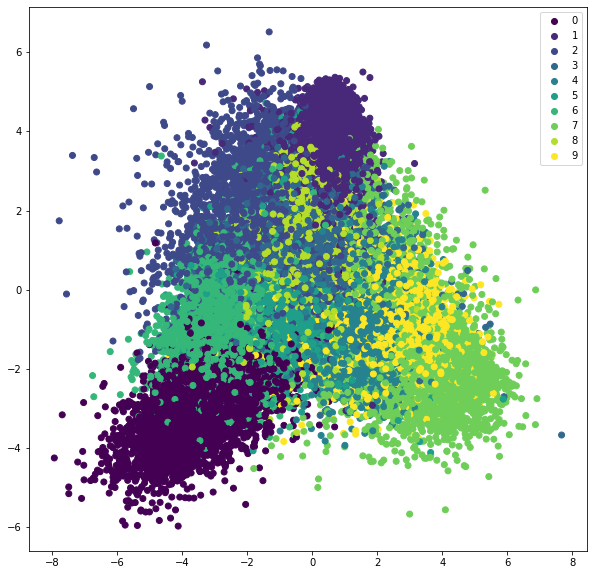

In [23]:
plt.figure(figsize=(10,10))
sc = plt.scatter(x_lda[:, 0], x_lda[:, 1], c=y)
plt.legend(handles=sc.legend_elements()[0], labels=list(range(10)))
plt.show()

## t-SNE

In [12]:
# taking only 10k samples for quick results
x_tsne = TSNE(n_jobs=-1).fit_transform(X[:10000])

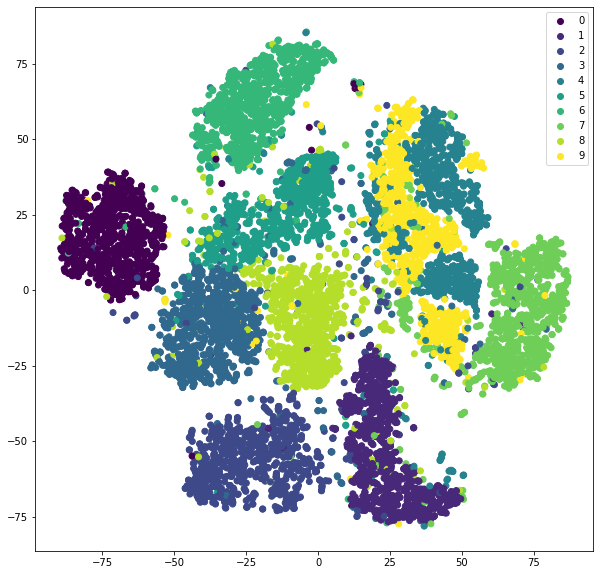

In [13]:
plt.figure(figsize=(10,10))
sc = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y[:10000])
plt.legend(handles=sc.legend_elements()[0], labels=list(range(10)))
plt.show()

## UMAP

In [6]:
x_umap = UMAP(n_neighbors=10, min_dist=0.1, metric='correlation').fit_transform(X)

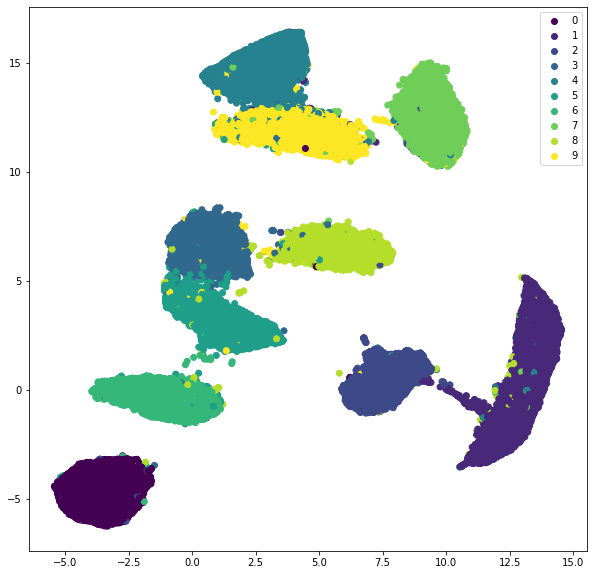

In [7]:
plt.figure(figsize=(10,10))
sc = plt.scatter(x_umap[:, 0], x_umap[:, 1], c=y)
plt.legend(handles=sc.legend_elements()[0], labels=list(range(10)))
plt.show()

# Handle Large Data (CSV)

In [2]:
df = pd.read_csv('data/1000000 Sales Records.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


In [3]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 14 entries, Region to Total Profit
dtypes: float64(5), int64(2), object(7)
memory usage: 489.9 MB


## nrows

In [4]:
df = pd.read_csv('data/1000000 Sales Records.csv', nrows=1000)
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 14 entries, Region to Total Profit
dtypes: float64(5), int64(2), object(7)
memory usage: 502.1 KB


In [6]:
cols = df.columns.values
cols

array(['Region', 'Country', 'Item Type', 'Sales Channel',
       'Order Priority', 'Order Date', 'Order ID', 'Ship Date',
       'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit'], dtype=object)

In [7]:
req_cols = ['Region', 'Country', 'Item Type', 'Sales Channel',
       'Order Priority',
       'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit']

In [8]:
df = pd.read_csv('data/1000000 Sales Records.csv', usecols=req_cols)
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,3973,47.45,31.79,188518.85,126301.67,62217.18


In [9]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 11 entries, Region to Total Profit
dtypes: float64(5), int64(1), object(5)
memory usage: 356.5 MB


## Convert Datatype of the Columns

In [10]:
df.describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06
mean,4998.867302,266.025488,187.522978,1.329563e+06,9.372671e+05,3.922956e+05
std,2885.334142,216.987966,175.650798,1.468527e+06,1.148954e+06,3.788199e+05
min,1.000000,9.330000,6.920000,9.330000e+00,6.920000e+00,2.410000e+00
25%,2502.000000,81.730000,35.840000,2.778672e+05,1.617289e+05,9.510480e+04
50%,4998.000000,154.060000,97.440000,7.844445e+05,4.667818e+05,2.810549e+05
75%,7496.000000,421.890000,263.330000,1.822444e+06,1.196327e+06,5.653076e+05
max,10000.000000,668.270000,524.960000,6.682700e+06,5.249600e+06,1.738700e+06


In [11]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('float16')
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('int16')
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [12]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 11 entries, Region to Total Profit
dtypes: category(5), float16(5), int16(1)
memory usage: 17.2 MB


In [13]:
df = pd.read_csv('data/1000000 Sales Records.csv', usecols=req_cols, dtype={'Region': 'category', 'Units Sold': 'int16'})
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 11 entries, Region to Total Profit
dtypes: category(1), float64(5), int16(1), object(4)
memory usage: 282.3 MB


## Load Dataset Faster using chunks

In [17]:
%%time
df = pd.read_csv('data/1000000 Sales Records.csv')
len(df)

Wall time: 2.1 s


1000000

In [19]:
%%time
chunks = pd.read_csv('data/1000000 Sales Records.csv', iterator=True, chunksize=1000)
# df = pd.concat(chunks, ignore_index=True)
# df.head()

Wall time: 5.01 ms


In [20]:
length = 0
for chunk in chunks:
    length += len(chunk)
length

1000000

In [ ]:
# multiprocessing, dask module, numpy